In [33]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0


In [3]:
# Load initial wave
Params = []
DT, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 1.0, 100, 0.05, 20.0, 0.5, 1e-5, 0.01);
    Lx = 20.0
    ϕa = 0.46
    ϕp = 0.3
    v0 = 8.5
    T, save_interval, param_name, pert = (Lx^2*5, 100.0, "soliton_speed_check", "lin")
param_old = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
ts, f_saves = load_compress_pde(param_old)
t, f = ts[end], f_saves[end]
println(t)
param_new = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert);

full load


saved
1200.0000076866875


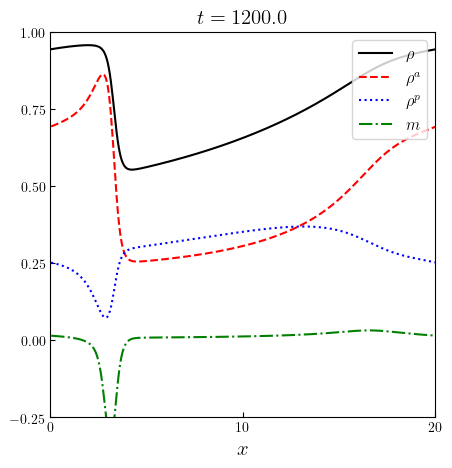

In [4]:
# Dispaly Profile
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))
        ax.plot(Δx:Δx:Lx, f[:,2]+f[:,1]+f[:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, f[:,1]+f[:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, f[:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, f[:,2]-f[:,1]; 
        color = "green", linestyle = "-.", label = L"m")
        
        d2(x) = round(x; digits = 2)
        latex_string = latexstring("\$ t = $(d2(t))\$")
        ax.set_title(latex_string, fontsize = 15)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"x", fontsize = 15)
display(fig)

full load


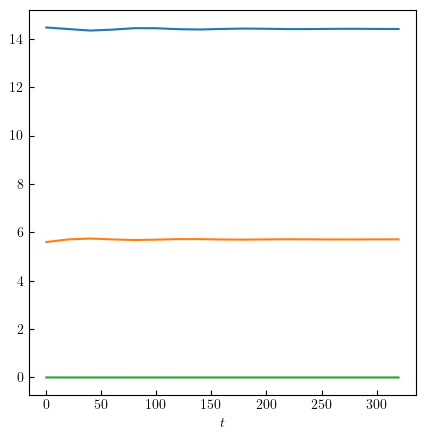

saved


0.39 0.25 


In [73]:
# check L2 time derivative
using PyPlot
param = get_grid_param(1,1)
#load saves
    param["ϕa"] = 0.39
    param["ϕp"] = 0.25 # 0.35
    param["T"] = 1000.0
    param["save_interval"] = 10.0
    ts, f_saves = load_compress_pde(param)
fig, ax = subplots(1,1,figsize=(5,5))
ax.plot(hcat([ts,ts]...), abs.(hcat(f_dot.([param for _ in f_saves], f_saves)...))'*diagm([1e2,1e2,1e2]))
            font = 10
            t_end = ts[end]
            t_start = ts[1]
            t_diff = t_end -t_start
            # h_max = maximum(ddf[2:end])*1.1
            # h_min = minimum(ddf[2:end])*0.9
            # h_diff = h_max - h_min
            #ax.get_xaxis().set_ticks(0:round(0.25*round(t_diff); digits = 0):round(t_diff;digits = 0 ))
            #ax.get_yaxis().set_ticks(0:round(h_max/4; digits = 10):h_max)
            # ax.axis([t_start,t_end, 0, 1])
            # ax.set_aspect((t_diff/h_diff))
            # ax.set_ylabel(L"\Vert \ddot f \Vert_2",fontsize = font)
            ax.set_xlabel(L"t", fontsize = font)
            ax.tick_params(labelbottom = true, direction = "in")
display(fig)
println("$(param["ϕa"]) $(param["ϕp"]) ")

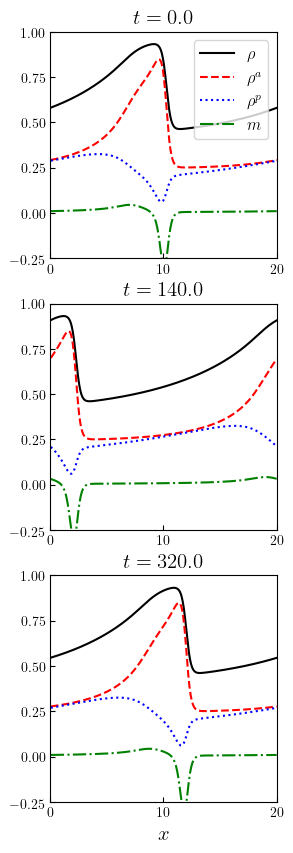

In [74]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
# frame = 1950
@unpack Nx = param
ft = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
frames = [1,Int64(length(ts) ÷ 2),length(ts)]
fig, axs = subplots(3,1,figsize=(5,10))
@unpack Δx, Lx = param
for (ax,frame) in zip(axs, frames)
        ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
        color = "green", linestyle = "-.", label = L"m")
        
        d2(x) = round(x; digits = 2)
        latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
        ax.set_title(latex_string, fontsize = 15)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
end
axs[1].legend(loc= "upper right", fontsize = 12)
axs[3].set_xlabel(L"x", fontsize = 15)
display(fig)
# fig_name = "wave_plot"
        #     @unpack ϕa, ϕp, v0, Lx = param
        #     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
        #     mkpath(pathname)
        #     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
        #     PyPlot.savefig(filename,dpi = 100, format = "pdf") 

In [29]:
speeds = []
im_lams = []
d2fs = []
rejects = []
extra = []
# 1:11 12:1:21 22:1:28
for (i,param) in enumerate(get_soliton_param.(1:46))
    c, df, d2f, f = load_wave_speed(param)
    push!(d2fs, df)
    if i<28 #(d2f<0.001) & (is_valid(f, param))
        push!(speeds,c)
        ω, λ, vec = lin_pert_values(param) 
        push!(im_lams, abs(imag(λ)))
        push!(extra, param["ϕp"])
    elseif i>36
        push!(speeds,c)
        ω, λ, vec = lin_pert_values(param) 
        push!(im_lams, abs(imag(λ)))
        push!(extra, param["ϕp"])
    else
        push!(rejects,i)
    end
end
#println(speeds," ",im_lams)
println(d2fs)
length(im_lams)


Any[0.010227026976044391, 0.009641383531124705, 0.009115488048591247, 0.008641295792021013, 0.00821187606468541, 0.007820885549877714, 0.00746305232878661, 0.00713321197539073, 0.006826380549608548, 0.00653820751078911, 0.006263194728658407, 0.00948860118620788, 0.008832047655412331, 0.008245375745039004, 0.007718718873034766, 0.007243880061861035, 0.006814057505455745, 0.006423528724179687, 0.006067469653797018, 0.005741765290761425, 0.005442934003731915, 0.006469721496222117, 0.00631134192056718, 0.006067896815511553, 0.0057470884330368555, 0.005363834408855905, 0.004889935460816757, 0.004126643172887737, 0.00036309245652638167, 1.5347449537228555e-5, 0.010881802662089669, 0.01161668614072223, 0.012444384246150679, 0.013378453034447072, 0.014425898356152989, 0.015450048050804448, 0.006611712983234593, 0.006652051201872041, 0.006666294140884393, 0.00666312599864257, 0.006636670340482554, 0.006592815686732649, 0.0065455253210703074, 0.00647399540770037, 0.0063907146890067115, 0.0062974

37

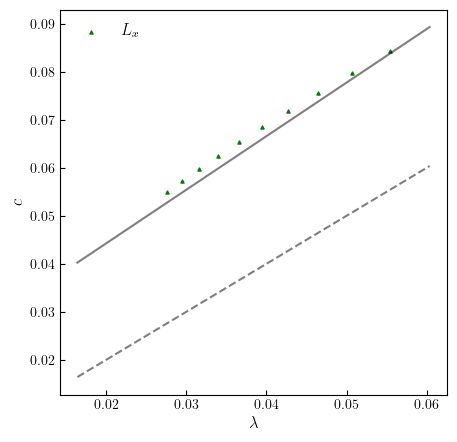

Any[0.010227026976044391, 0.009641383531124705, 0.009115488048591247, 0.008641295792021013, 0.00821187606468541, 0.007820885549877714, 0.00746305232878661, 0.00713321197539073, 0.006826380549608548, 0.00653820751078911, 0.006263194728658407, 0.00948860118620788, 0.008832047655412331, 0.008245375745039004, 0.007718718873034766, 0.007243880061861035, 0.006814057505455745, 0.006423528724179687, 0.006067469653797018, 0.005741765290761425, 0.005442934003731915, 0.006469721496222117, 0.00631134192056718, 0.006067896815511553, 0.0057470884330368555, 0.005363834408855905, 0.004889935460816757, 0.004126643172887737, 0.00036309245652638167, 1.5347449537228555e-5, 0.010881802662089669, 0.01161668614072223, 0.012444384246150679, 0.013378453034447072, 0.014425898356152989, 0.015450048050804448, 0.006611712983234593, 0.006652051201872041, 0.006666294140884393, 0.00666312599864257, 0.006636670340482554, 0.006592815686732649, 0.0065455253210703074, 0.00647399540770037, 0.0063907146890067115, 0.0062974

In [43]:
# speeds = []
# im_lams = []
# d2fs = []
# rejects = []
# extra = []
# # 1:11 12:1:21 22:1:36 37:1:46
# for param in get_soliton_param.(1:46)
#     c, df, d2f, f = load_wave_speed(param)
#     push!(d2fs, df)
#     if (d2f<0.002) & (is_valid(f, param))
#         push!(speeds,c)
#         ω, λ, vec = lin_pert_values(param) 
#         push!(im_lams, abs(imag(λ)))
#         push!(extra, param["ϕp"])
#     else
#         push!(rejects,param)
#     end
# end
#println(speeds," ",im_lams)
println(d2fs)
# Dispaly Profile
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = subplots(1,1,figsize=(5,5))
x = Matrix{Float64}(hcat(im_lams,ones(length(im_lams))))
y = Vector{Float64}(speeds)
beta = (x'*x)\x'*y
lin_speeds = x*beta
# ax.plot( im_lams, lin_speeds; color = "black", alpha = 0.5, )
xx = minimum(im_lams):0.001:maximum(im_lams)
XX = hcat(xx,ones(length(xx)))
ax.plot( xx, XX*beta; color = "black", alpha = 0.5, )
ax.plot( xx, xx; color = "black", alpha = 0.5, linestyle = "--")
#ax.scatter(im_lams[1:11], y[1:11]; color = "blue", s = 5, marker= "^", label = L"\phi_a")
ax.scatter(im_lams[12:1:21], y[12:1:21]; color = "green", s = 5, marker= "^", label = L"L_x")
#ax.scatter(im_lams[22:1:28], y[22:1:28]; color = "red", s = 5, marker= "^", label = L"\phi_p")
#ax.scatter(im_lams[29:1:37], y[29:1:37]; color = "purple", s = 5, marker= "^", label = L"\mathrm{Pe}")
#ax.scatter(im_lams[22:1:31], y[22:1:31]; color = "purple", s = 5, marker= "^", label = L"\mathrm{Pe}")
        # ax.get_xaxis().set_ticks(0:10.0:Lx)
        # ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        # ax.set_aspect((Lx/(1.25)))
        # ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
# ax.legend(loc= "upper right", fontsize = 12)
ax.set_xlabel(L"\lambda", fontsize = 12)
ax.set_ylabel(L"c", fontsize = 12)
ax.legend(loc= "top left", fontsize= 12, edgecolor = "white") # bbox_to_anchor=(1.0, 1.0)
print("beta: ",beta, ", mse: ", norm(y-x*beta)^2)
display(fig)
fig_name = "speed_plot"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/beta = $(beta), mse = $norm(y-x*beta)^2).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

param = get_soliton_param(10)
param["save_interval"] = 1.0
param["T"] = 159.0
ts, f_saves = load_compress_pde(param)
t, f = ts[end], f_saves[end]
param["save_interval"] = 0.01


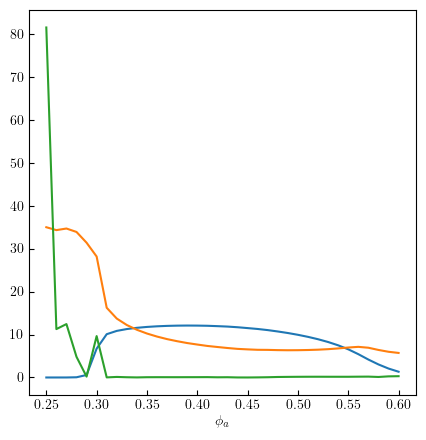

In [84]:
# xs = collect(0.25:0.01:0.6)
# params = get_active_param.(1:36)
# fs = [load_last_pde(param)[2] for param in params];

fig, ax = subplots(1,1,figsize=(5,5))
ax.plot(xs, abs.(hcat(f_dot.(params, fs)...))'*diagm([1e2,1e2,1e4]))
            font = 10
            t_end = ts[end]
            t_start = ts[1]
            t_diff = t_end -t_start
            # h_max = maximum(ddf[2:end])*1.1
            # h_min = minimum(ddf[2:end])*0.9
            # h_diff = h_max - h_min
            #ax.get_xaxis().set_ticks(0:round(0.25*round(t_diff); digits = 0):round(t_diff;digits = 0 ))
            #ax.get_yaxis().set_ticks(0:round(h_max/4; digits = 10):h_max)
            # ax.axis([t_start,t_end, 0, 1])
            # ax.set_aspect((t_diff/h_diff))
            # ax.set_ylabel(L"\Vert \ddot f \Vert_2",fontsize = font)
            ax.set_xlabel(L"\phi_a", fontsize = font)
            ax.tick_params(labelbottom = true, direction = "in")
display(fig)

In [92]:
function type(param, f)
    normf, c1, dc = f_dot(param, f)
    mag = f[:,2] - f[:,1]
    if (normf < 1e-2)|(maximum(abs.(mag))<1e-4)
        return 1 # homogeneous
    elseif c1 < 5e-4
        return 2 # stationary inhomo
    elseif abs(minimum(mag)+maximum(mag)) > maximum(mag)/2
        return 4 # soliton
    elseif c1 < 5e-3
        return 3 # slow inhomo
    else
        return 5 # complex
    end
end

function type_marker(i)
    if i ==1
        return "^"
    elseif i ==2
        return "x"
    elseif i ==3
        return "o"
    else
        return "."
    end
end

function plot_phase(fig, ax, Pe)
    Pes = [Pe]
    axlims = [[0.0, 1.0, 0, 0.4]]
    axs = [ax]
    for (i,(ax, Pe, axlim)) in enumerate(zip(axs, Pes, axlims))
        # load binodal
            filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
            data = wload(filename)
            @unpack Pe, γs, ϕ1s, ϕ2s = data

        # plot binodal
            binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")
            ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")
            #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

            rc("text", usetex=true)
            ax.xaxis.set_tick_params(labelsize=15)
            ax.xaxis.tick_bottom()
            ax.yaxis.set_tick_params(labelsize=15)
            
            #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
            ax.set_xlabel(L"\phi^a",fontsize=20)
            ax.set_ylabel(L"\phi^p", fontsize=20)
            # ax.legend(loc = "upper right", fontsize=20)
            # ax.set_aspect(0.25*Δρ/ΔPe)
            title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
            ax.set_title(title,fontsize=20)
            ax.tick_params(labelbottom = true, direction = "in")
        #
        # plot spinodal
            ϕas_left, ϕas_right, ϕps = return_spin(;Pe = Pe, Δϕ = 0.0001)
            ax.plot(ϕas_left, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
            ax.plot(ϕas_right, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
        #
        # phase shading
        if i ==2
            ax.fill_betweenx(ϕps,ϕas_left,ϕas_right , color = "red", alpha = 0.3, linewidth = 0) 
            max_ϕa = maximum(ϕas_left)
            max_ϕp = maximum(ϕps)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s).+0.00001)
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,(gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left), color = "green", alpha = 0.3, linewidth = 0)
        
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_right,(gammas_converter_a(γ_grid, ϕ1_grid) .≥ ϕas_right), color = "green", alpha = 0.3, linewidth = 0)
        
            #ax.plot(gammas_converter_a(γ_grid, ϕ2_grid), ϕps)
            #ax.plot(ϕas_right, ϕps)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s).+0.00001)
            ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0) 
            else
            # find final find gamma
            final_γ = 0.
            final_ϕ1 = 0.
            final_ϕ2 = 0.
            for (γ, ϕ1, ϕ2) in zip(γs, ϕ1s, ϕ2s)
                if (is_stable_value(gamma_converter(γ, ϕ1)...; Pe = Pe)>0)|(is_stable_value(gamma_converter(γ, ϕ2)...; Pe = Pe)>0)
                    final_γ = γ
                    final_ϕ1 = ϕ1
                    final_ϕ2 = ϕ2
                    break
                end
            end
            # shading
            tie_line_x = -ϕps*final_γ/(final_γ-1).+1
            ax.fill_betweenx(ϕps,max.(tie_line_x,ϕas_left),ϕas_right, max.(tie_line_x,ϕas_left) .≤ ϕas_right , color = "blue", alpha = 0.3, linewidth = 0) 
            ax.fill_betweenx(ϕps,ϕas_left,min.(tie_line_x,ϕas_right), ϕas_left .≤ min.(tie_line_x,ϕas_right) , color = "red", alpha = 0.3, linewidth = 0) 
            
            xs = []
            ys = []
            for (x,y) in zip(tie_line_x,ϕps)
                if (x+y ≤ final_ϕ2)&(x+y ≥ final_ϕ1)
                    push!(xs,x)
                    push!(ys,y)
                end
            end
            ax.plot(xs,ys,color = "black")

            max_ϕa = maximum(ϕas_left)
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ1s))
            ax.fill_betweenx(ϕps,gammas_converter_a(γ_grid, ϕ1_grid),ϕas_left,gammas_converter_a(γ_grid, ϕ1_grid) .≤ ϕas_left, color = "green", alpha = 0.3, linewidth = 0)
        
            ϕas_left, ϕas_right, ϕps, γ_grid, ϕ1_grid, ϕ2_grid = return_spin_from_grid(;max_ϕa = max_ϕa, Pe = Pe, γ_grid = γs, ϕ1_grid = ϕ1s, ϕ2_grid = ϕ2s, ϕp_grid = gammas_converter_p(γs, ϕ2s))
            ax.fill_betweenx(ϕps,ϕas_right,gammas_converter_a(γ_grid,ϕ2_grid ),gammas_converter_a(γ_grid, ϕ2_grid) .≥ ϕas_right, color = "green", alpha = 0.3, linewidth = 0) 
            
        end

    end
    fig.tight_layout()
    #axs[2].legend(loc = "upper right", fontsize=20)
    # for (i,(ax, params)) in enumerate(zip(axs, param_sets))
    #     ϕas = []
    #     ϕps = []
    #     for param in params
    #         local pde_ts, f_saves, f, t, ϕal, ϕag, ϕpl, ϕpg
    #         #load saves
    #         pde_ts, f_saves = load_compress_pde(param)
    #         f = f_saves[end]
    #         t = pde_ts[end]

    #         if t > 500
    #             rho = f[:,1] + f[:,2] + f[:,3]
    #             min_pt = argmax(rho)
    #             max_pt = argmin(rho)
    #             if min_pt<max_pt
    #                 global x,X
    #                 x = min_pt:5:max_pt
    #                 X = min_pt:(max_pt-min_pt):max_pt
    #             else
    #                 global x,X 
    #                 x = max_pt:5:min_pt
    #                 X = max_pt:(min_pt-max_pt):min_pt
    #             end


    #             ax.plot(f[X,1] + f[X,2], f[X,3], color = "black",linestyle = "-", label = "_gas phase", alpha = 0.5)

    #             ax.scatter(f[x,1] + f[x,2], f[x,3], color = "black", marker = ".", edgecolor = "black", s = 5.0, alpha = 1, label = "_gas phase")
                
    #             ϕal = maximum( f[x,1] + f[x,2])
    #             ϕag = minimum( f[x,1] + f[x,2])
    #             ϕpl = minimum( f[x,3] )
    #             ϕpg = maximum( f[x,3] )
            
    #             push!(ϕas, ϕal)
    #             push!(ϕas, ϕag)
    #             push!(ϕps, ϕpl)
    #             push!(ϕps, ϕpg)
    #         end
    #     end
    #     ax.scatter(ϕas, ϕps; color = "black", marker = "^", edgecolor = "black")
    # end
    ax.xaxis.set_ticks(0.:0.5:1.0)
    ax.yaxis.set_ticks(0.:0.1:0.4)
    ax.axis([0.0, 1.0, 0, 0.4])
end

plot_phase (generic function with 1 method)

In [93]:
#params = [ get_grid_param(i,j) for i in 1:31 for j in 1:21];
params = [ get_grid_param_wide(i,j) for i in 1:31 for j in 1:20];
cut_off = 300.0
# loads = [quiet_load_last_pde(param) for param in params];
fs = [load[2] for load in loads if load[1]&(load[3]>cut_off)];
ts = [load[3] for load in loads if load[1]&(load[3]>cut_off)];
params = [ param for (param,load) in zip(params,loads) if load[1]&(load[3]>cut_off)];
types = type.(params, fs);

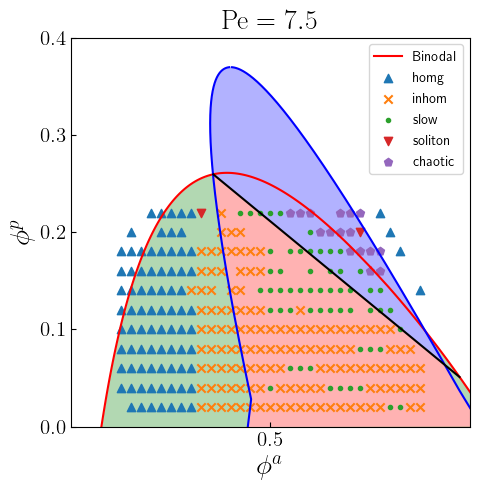

In [94]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = plt.subplots(1,1, figsize=(5,5))

plot_phase(fig, ax, 7.5)

for (i,(s,label)) in enumerate(zip(["^","x",".","v","p"],["homg", "inhom", "slow","soliton", "chaotic"]))
    xs = [ param["ϕa"] for (param,type) in zip(params,types) if type ==i];
    ys = [ param["ϕp"] for (param,type) in zip(params,types) if type ==i];
    ax.scatter(xs,ys; marker = s, label = label)
end
ax.legend()
ax.axis([0.1, 0.9, 0.0, 0.4])
display(fig)

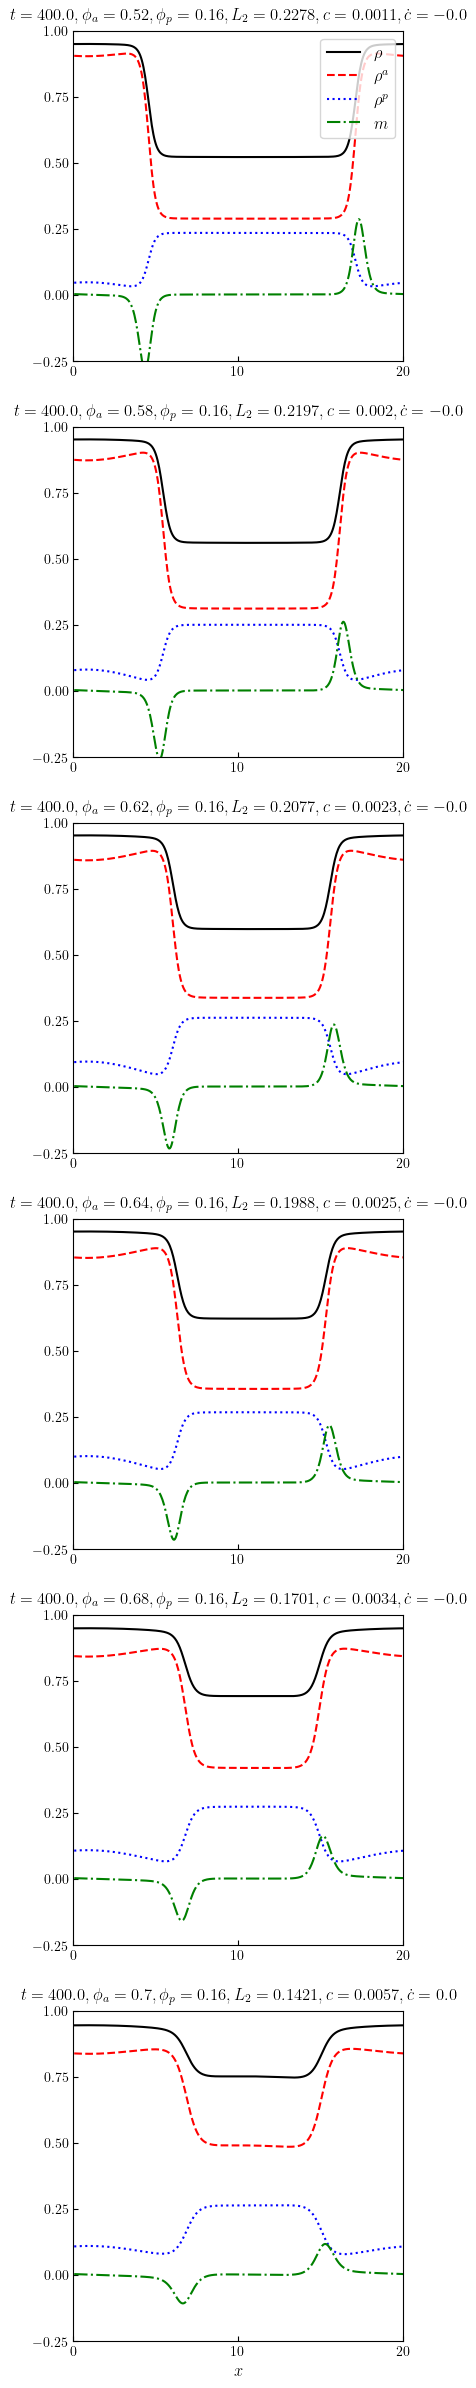

6


In [78]:
param_filter(type,param) = (type ==3)&(param["ϕp"]==0.16)&(param["ϕa"]>0.45)

f1 = [ f for (param,f,type)   in zip(params,fs,types) if param_filter(type,param)]
t1 = [ t for (param,t,type)   in zip(params,ts,types) if param_filter(type,param)]
p1 = [ param for (param,type) in zip(params,types)    if param_filter(type,param)]
n_plots = length(p1)
println(n_plots)
if n_plots ==1
        fig, ax = subplots(n_plots,1,figsize=(5,5*n_plots))
        axs = [ax]
else
        fig, axs = subplots(n_plots,1,figsize=(5,5*n_plots))
end
for (i,(ax,param,f,t)) in enumerate(zip(axs,p1,f1,t1))
        @unpack Δx, Lx = param
        ax.plot(Δx:Δx:Lx, f[:,2]+f[:,1]+f[:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, f[:,1]+f[:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, f[:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, f[:,2]-f[:,1]; 
        color = "green", linestyle = "-.", label = L"m")
        
        d2(x) = round(x; digits = 2)
        d4(x) = round(x; digits = 4)
        normf, c1, dc = f_dot(param, f)
        latex_string = latexstring("\$ t = $(d2(t)), \\phi_a = $(param["ϕa"]), \\phi_p = $(param["ϕp"]), L_2 = $(d4(normf)), c = $(d4(c1)), {\\dot c} = $(d4(dc))\$")
        ax.set_title(latex_string, fontsize = 12)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(1.25)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
end
axs[1].legend(loc= "upper right", fontsize = 12)
axs[end].set_xlabel(L"x", fontsize = 12)
display(fig)

In [66]:
f = f1[end]

m = f[:,1]-f[:,2]

maximum(m)+minimum(m)

type(p1[end],f1[end])





3